### Student Information
Name:謝欣妤

Student ID:110034007

GitHub ID:hsinyu1226

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

# Part 2: New Dataset

In [13]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
print('done')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
done


## 1. Data Preparation

In [14]:
import pandas as pd

X = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
X

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


In [15]:
len(X)

1500

In [24]:
label_mapping = {
    'not nostalgia': 0,
    'nostalgia': 1
}
X['label'] = X['sentiment'].map(label_mapping)
X

,sentiment,comment,label
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1
...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",0
1496,not nostalgia,it's sad this is such a beautiful song when yo...,0
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",0
1498,nostalgia,I was born in 1954 and started to be aware of ...,1


### View the data

In [25]:
X[0:10]

,sentiment,comment,label
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1
5,nostalgia,"Every time I heard this song as a child, I use...",1
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,1
8,not nostalgia,Wherever you are you always in my heart,0
9,not nostalgia,Elvis will always be number one no one can com...,0


In [26]:
X[-10:]

,sentiment,comment,label
1490,not nostalgia,"He really isn't my cup of tea, but some of his...",0
1491,nostalgia,real music...how i miss those days...brings ba...,1
1492,nostalgia,i used to cry over this song cause i had a boy...,1
1493,not nostalgia,"He really has that ""love you like a brother"" l...",0
1494,not nostalgia,That's funny. But Leo really is a nice guy. He...,0
1495,not nostalgia,"i don't know!..but the opening of the video,.....",0
1496,not nostalgia,it's sad this is such a beautiful song when yo...,0
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",0
1498,nostalgia,I was born in 1954 and started to be aware of ...,1
1499,nostalgia,This is the first CD I bought after my marriag...,1


## 2. Data Mining using Pandas

### Missing Values

In [28]:
# check missing values
X.isnull().sum()

sentiment    0
comment      0
label        0
dtype: int64

### Dealing with Duplicate Data

In [30]:
sum(X.duplicated())

1

In [31]:
sum(X.duplicated('comment'))

1

In [32]:
X.drop_duplicates(inplace=True)
print(sum(X.duplicated()))
print(X.shape)

0
(1499, 3)


## 3. Data Preprocessing

### Sampling

In [33]:
X_sample = X.sample(n=1000) #random state
len(X_sample)

1000

In [34]:
X_sample[0:4]

,sentiment,comment,label
1287,not nostalgia,Stop complaining guys!! Go make music as good ...,0
111,nostalgia,I love this song so much. I can still remember...,1
161,nostalgia,"""Distant Drums"" is maybe the first memory of J...",1
1374,not nostalgia,Best download yet....They had their own sound ...,0


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution for X'}, xlabel='sentiment'>

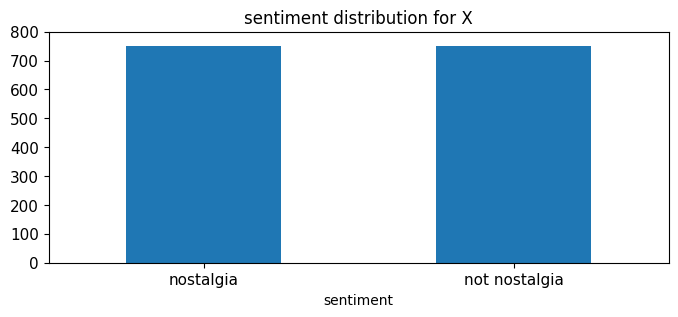

In [38]:
print(X.sentiment.value_counts())
upper_bound = max(X.sentiment.value_counts()+50)
# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution for X',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sentiment
not nostalgia    504
nostalgia        496
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution for X_sample'}, xlabel='sentiment'>

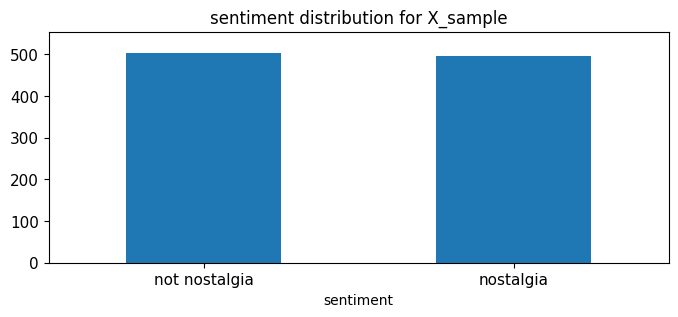

In [39]:
print(X_sample.sentiment.value_counts())
upper_bound = max(X_sample.sentiment.value_counts()+50)
# plot barchart for X_sample
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution for X_sample',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

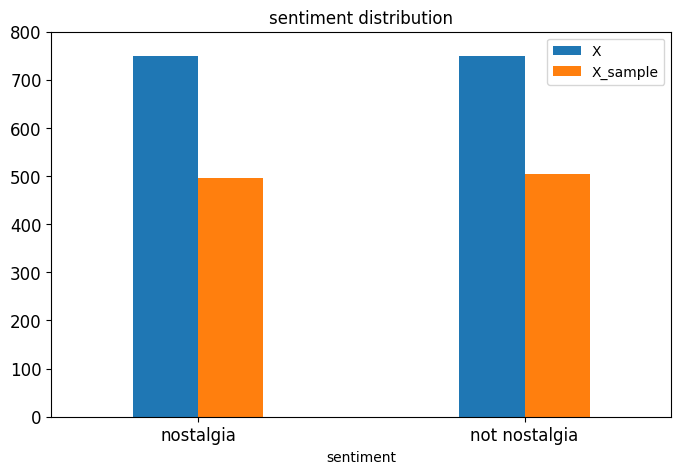

In [40]:
# Answer here
X_sentiment_counts = X.sentiment.value_counts()
X_sample_sentiment_counts = X_sample.sentiment.value_counts()

# 合併為一個 DataFrame
df_counts = pd.DataFrame({'X': X_sentiment_counts, 'X_sample': X_sample_sentiment_counts})

# side-by-side bar chart
df_counts.plot(kind = 'bar', 
               title = 'sentiment distribution',
               width = 0.4,
               ylim = [0,max(X_sentiment_counts.max(),X_sample_sentiment_counts.max())+50],
               rot = 0,
               fontsize = 12, 
               figsize = (8,5),
              )
plt.legend(['X', 'X_sample'], loc='upper right')

### Feature Creation

In [41]:
import ssl
import certifi
ssl._create_default_https_context = ssl._create_unverified_context
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/xiexinyu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [43]:
# import helpers.data_mining_helpers as dmh -->failed
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [44]:
X['unigrams'] = X['comment'].apply(lambda x: tokenize_text(x))

In [45]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [46]:
X[0:4]

,sentiment,comment,label,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [47]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### Feature subset selection

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [49]:
count_vect.get_feature_names_out()[3284]

'the'

In [50]:
count_vect.get_feature_names_out()[1598]

'he'

In [51]:
analyze = count_vect.build_analyzer()
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [52]:
X_counts.shape

(1499, 3730)

In [53]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [54]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

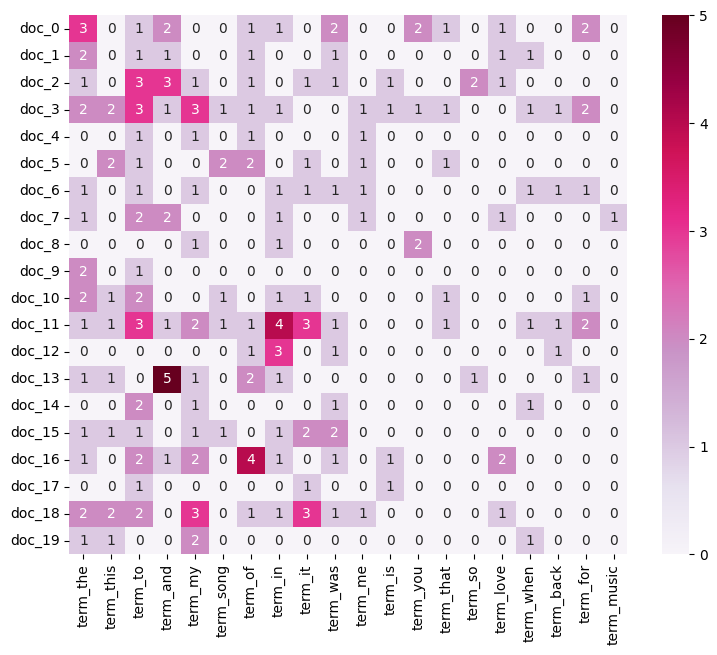

In [55]:
import seaborn as sns
import numpy as np

#choose the most frequent 20 terms
term_frequencies = np.array(X_counts.sum(axis=0)).flatten() 
top_20_term_indices = term_frequencies.argsort()[-20:][::-1]

top_20_terms = [count_vect.get_feature_names_out()[i] for i in top_20_term_indices]

plot_x = ["term_"+term for term in top_20_terms]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, top_20_term_indices].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=plot_z.max(), annot=True)

### Attribute Transformation / Aggregation

In [56]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

print('done')

done


In [57]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

/var/folders/1t/gt97zhh53p5f8d2h13vcyjfw0000gn/T/ipykernel_51950/3480579971.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


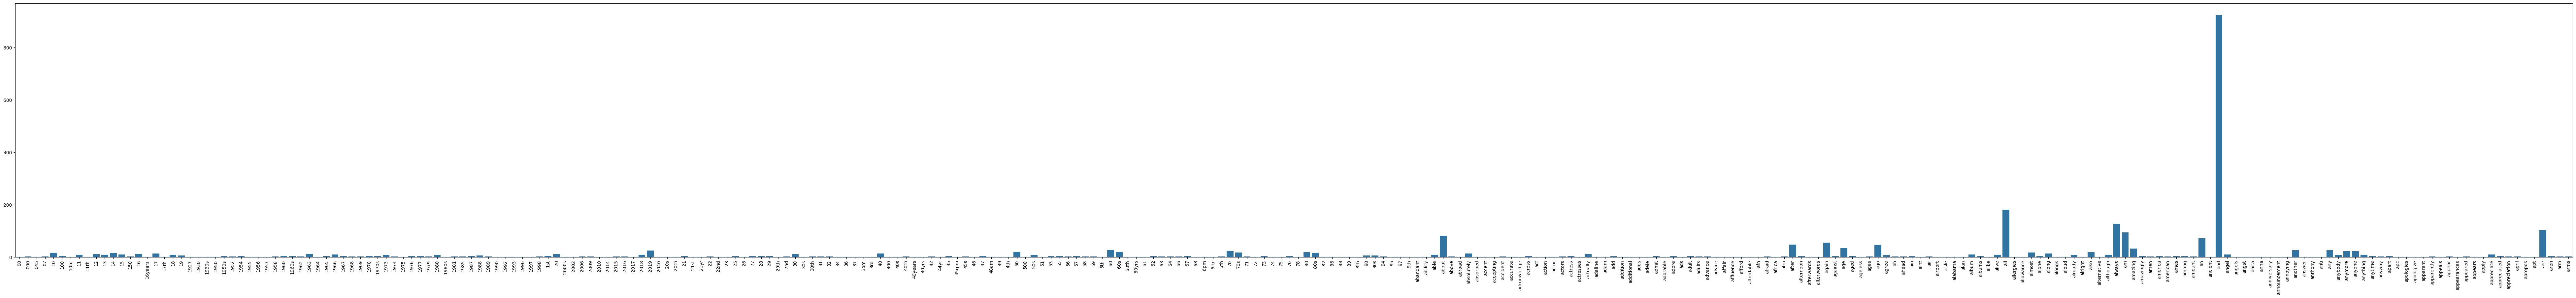

In [58]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

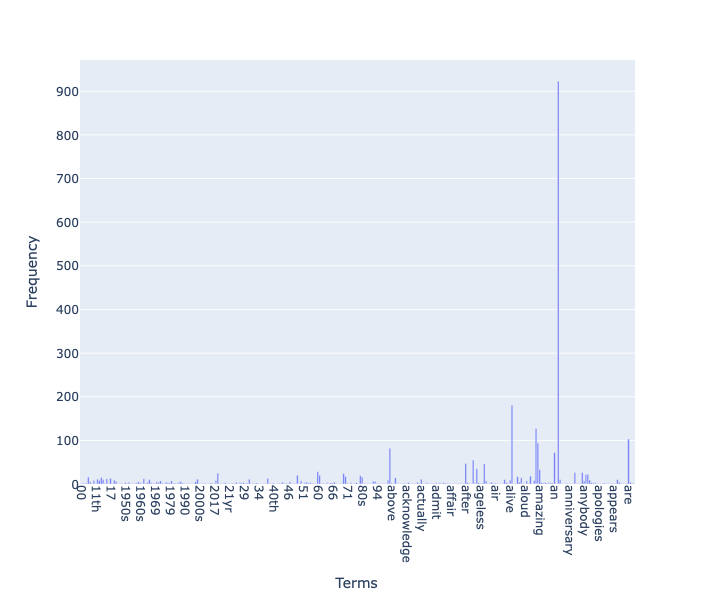

In [62]:
import numpy as np
import plotly.express as px

terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

df_plot = pd.DataFrame({"Term": terms, "Frequency": frequencies})

# Using Plotly
fig = px.bar(df_plot, x="Term", y="Frequency",
             labels={"Term": "Terms", "Frequency": "Frequency"}, width=700, height=600)

fig.update_layout(xaxis=dict(tickangle=90))  
fig.show()

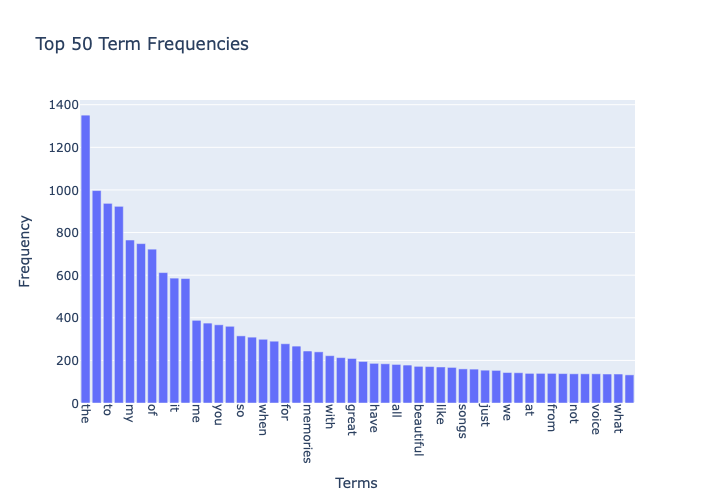

In [63]:
# Choose top 50 terms
import plotly.express as px
top_n_terms = 50

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()
terms_with_freq = sorted(zip(terms, term_frequencies), key=lambda x: x[1], reverse=True)

top_terms = [term for term, freq in terms_with_freq[:top_n_terms]]
top_frequencies = [freq for term, freq in terms_with_freq[:top_n_terms]]

# Using Plotly 
df_plot = pd.DataFrame({"Term": top_terms, "Frequency": top_frequencies})

fig = px.bar(df_plot, x="Term", y="Frequency", title=f"Top {top_n_terms} Term Frequencies", 
             labels={"Term": "Terms", "Frequency": "Frequency"}, width=800, height=500)
fig.update_layout(xaxis=dict(tickangle=90))
fig.show()

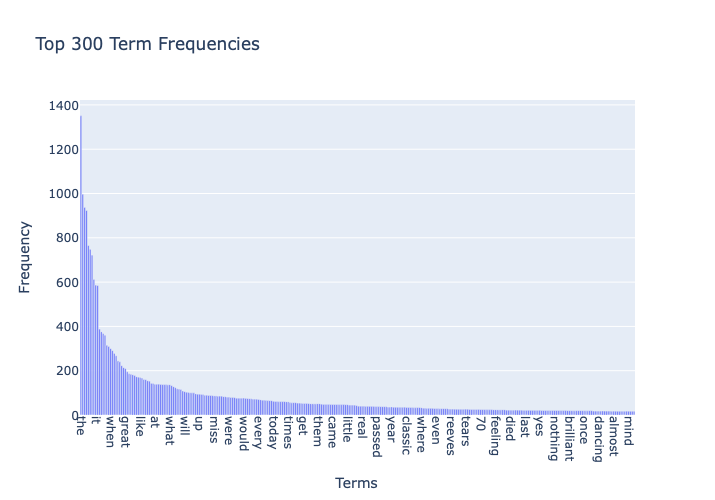

In [64]:
# Choose top 300 terms
import plotly.express as px
top_n_terms = 300

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

#sorting
terms_with_freq = sorted(zip(terms, term_frequencies), key=lambda x: x[1], reverse=True)

top_terms = [term for term, freq in terms_with_freq[:top_n_terms]]
top_frequencies = [freq for term, freq in terms_with_freq[:top_n_terms]]

# Using Plotly 
df_plot = pd.DataFrame({"Term": top_terms, "Frequency": top_frequencies})

fig = px.bar(df_plot, x="Term", y="Frequency", title=f"Top {top_n_terms} Term Frequencies", 
             labels={"Term": "Terms", "Frequency": "Frequency"}, width=800, height=500)
fig.update_layout(xaxis=dict(tickangle=90))
fig.show()

In [65]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/1t/gt97zhh53p5f8d2h13vcyjfw0000gn/T/ipykernel_51950/2166548998.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



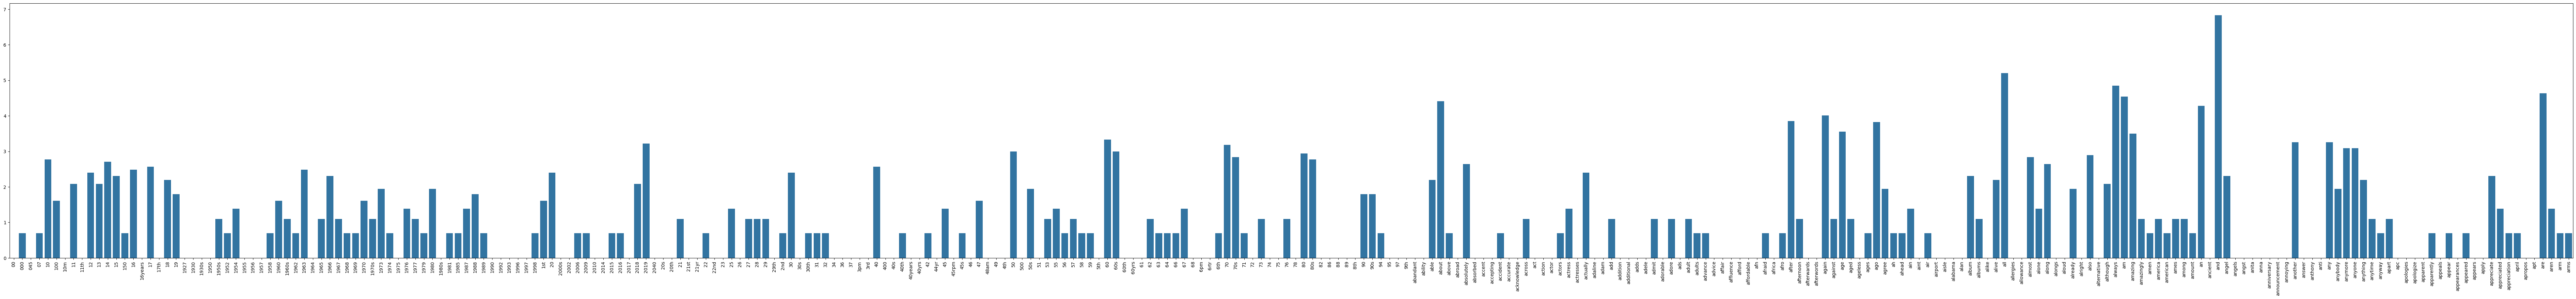

In [66]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

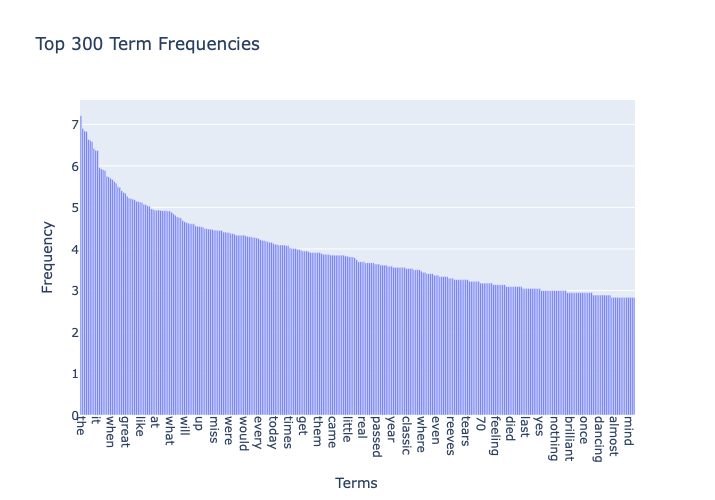

In [67]:
# Choose top 300 terms
import plotly.express as px
import math

top_n_terms = 300

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()
term_frequencies_log = [math.log(i) for i in term_frequencies]

#sorting
terms_with_freq = sorted(zip(terms, term_frequencies_log), key=lambda x: x[1], reverse=True)

top_terms = [term for term, freq in terms_with_freq[:top_n_terms]]
top_frequencies = [freq for term, freq in terms_with_freq[:top_n_terms]]

# Using Plotly 
df_plot = pd.DataFrame({"Term": top_terms, "Frequency": top_frequencies})

fig = px.bar(df_plot, x="Term", y="Frequency", title=f"Top {top_n_terms} Term Frequencies", 
             labels={"Term": "Terms", "Frequency": "Frequency"}, width=800, height=500)
fig.update_layout(xaxis=dict(tickangle=90))
fig.show()

### Finding frequent patterns

In [68]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [72]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=1 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


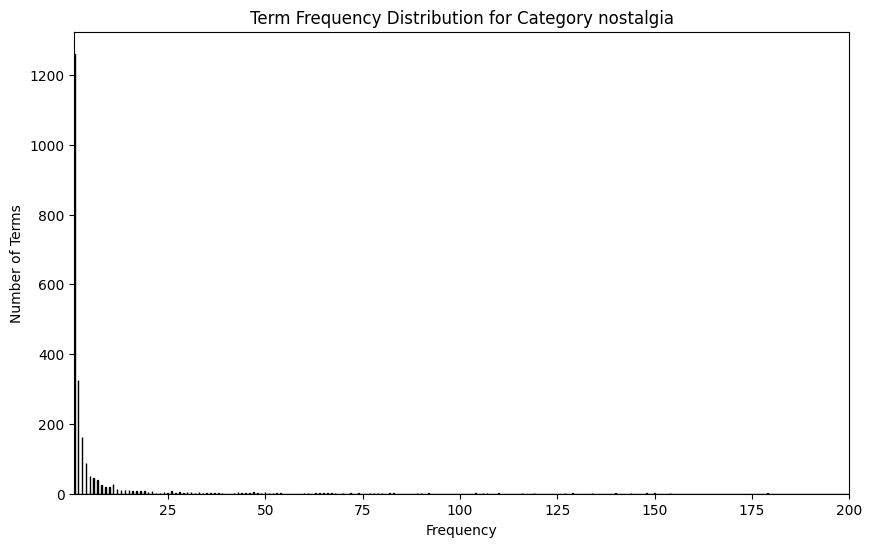

In [75]:
# Sum over all documents to get total frequency for each word
category_number=1 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [76]:
category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'what', 'not', 'be', 'can', 'me', 'voice', 'just', 'as', 'beautiful', 'songs', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'never', 'much', 'about', 'who', 'really', 'if', 'we', 'more', 'best', 'ever', 'by', 'thank', 'think', 'would', 'only', 'how', 'don', 'still', 'has', 'very', 'there', 'am', 'out', 'him', 'these', 'could', 'up', 'old', 'hear', 'do', 'listen', 'an', 'singer', 'had', 'many', 'here', 'such', 'version', 'too', 'today', 'been', 'most', 'get', 'your', 'people', 'world', 'heard', 'man', 'video', 'some', 'sing', 'listening', 'real', 'years', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'day', 'its', 'then', 'way', 'sad', 'those',

In [77]:
sorted_counts

array([708, 452, 451, ...,   1,   1,   1])

In [78]:
sorted_indices

array([2276, 2290,  160, ..., 1509, 1510,    0])

In [79]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) 
#Here we can sum up the column corresponding to the top 5% words, we just specify which one first.


708

In [80]:
category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [81]:
sorted_counts

array([  1,   1,   1, ..., 451, 452, 708])

In [82]:
sorted_indices

array([   0, 1510, 1509, ...,  160, 2290, 2276])

In [83]:
filt_term_document_dfs[categories[category_number]].loc[:,'milestone'].sum(axis=0) 
#Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

1

In [84]:
category_number=0 #You can change it from 0 to 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

,000,045,10,100,10m,11,12,14,15,150,...,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### PAMI

In [90]:
#from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace(' ', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


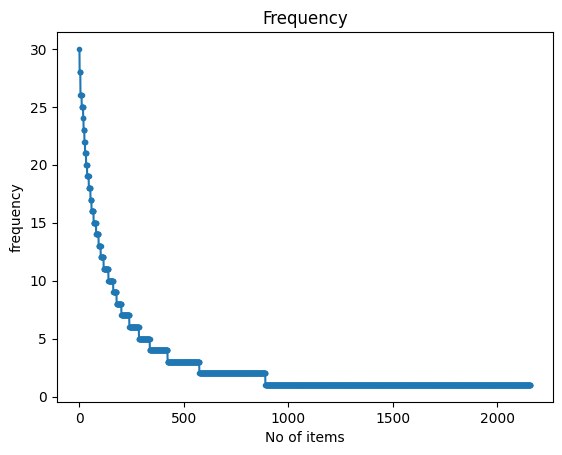

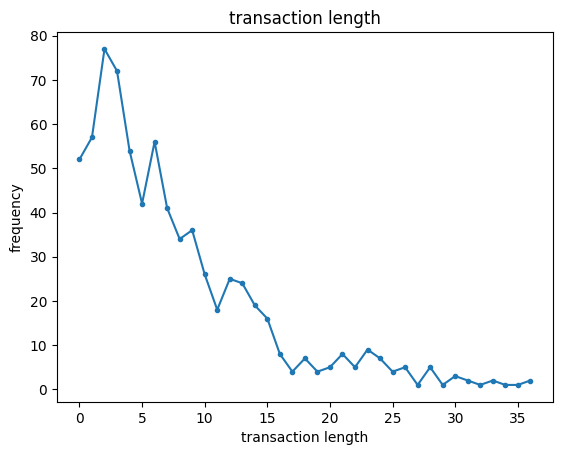

In [91]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


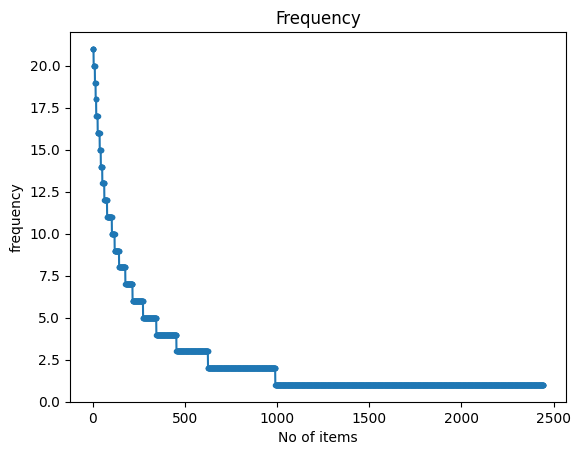

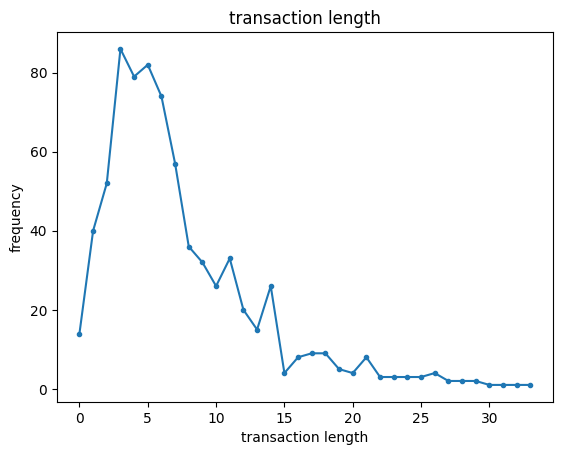

In [92]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [94]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.01566314697265625


In [95]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,will,28
178,go,28


In [96]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.009884119033813477


In [97]:
obj1.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,every,21
140,loved,21
141,classic,21
142,them,21


In [98]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [99]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
# FAE TopK for nostalgia 
from PAMI.frequentPattern.topk import FAE  as alg

k_values = [500]
top_k_results = {}

for k in k_values:
    obj_top_k = alg.FAE(iFile='td_freq_db_nostalgia.csv', k=k)
    obj_top_k.mine()
    patterns_top_k_df = obj_top_k.getPatternsAsDataFrame()
    runtime_top_k = obj_top_k.getRuntime()
    obj_top_k.save(f'patterns_top_{k}_df.txt') #save the patterns

    top_k_results[k] = {
        'patterns': patterns_top_k_df,
        'runtime': runtime_top_k,
        'total_patterns': len(patterns_top_k_df)
    }
    
    print(f'Total patterns for Top-K (k={k}): {top_k_results[k]["total_patterns"]}')
    print(f'Runtime for Top-K (k={k}): {runtime_top_k}')
    print(f'Patterns for Top-K (k={k}):')
    display(patterns_top_k_df)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total patterns for Top-K (k=500): 500
Runtime for Top-K (k=500): 0.09984517097473145
Patterns for Top-K (k=500):


,Patterns,Support
0,favorite,30
1,ever,28
2,would,28
3,will,28
4,go,28
...,...,...
495,don house,4
496,god bless,4
497,brenda lee,4
498,august,3


In [103]:
# FAE TopK for not_nostalgia 
from PAMI.frequentPattern.topk import FAE  as alg

k_values = [500]
top_k_results = {}

for k in k_values:
    obj_top_k = alg.FAE(iFile='td_freq_db_not_nostalgia.csv', k=k)
    obj_top_k.mine()
    patterns_top_k_df = obj_top_k.getPatternsAsDataFrame()
    runtime_top_k = obj_top_k.getRuntime()
    obj_top_k.save(f'patterns_top_{k}_df.txt') #save the patterns

    top_k_results[k] = {
        'patterns': patterns_top_k_df,
        'runtime': runtime_top_k,
        'total_patterns': len(patterns_top_k_df)
    }
    
    print(f'Total patterns for Top-K (k={k}): {top_k_results[k]["total_patterns"]}')
    print(f'Runtime for Top-K (k={k}): {runtime_top_k}')
    print(f'Patterns for Top-K (k={k}):')
    display(patterns_top_k_df)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total patterns for Top-K (k=500): 500
Runtime for Top-K (k=500): 0.061087846755981445
Patterns for Top-K (k=500):


,Patterns,Support
0,elvis,21
1,every,21
2,loved,21
3,classic,21
4,them,21
...,...,...
495,while,3
496,aren,3
497,line,3
498,beyond,3


In [104]:
# MaxFPGrowth for nostalgia 
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg

min_sup_values = [3, 6, 9]
max_fp_results = {}

for min_sup in min_sup_values:
    obj_max_fp = alg.MaxFPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=min_sup)
    obj_max_fp.mine()
    patterns_max_fp_df = obj_max_fp.getPatternsAsDataFrame()
    runtime_max_fp = obj_max_fp.getRuntime()
    obj_max_fp.save(f'patterns_max_fp_ms{min_sup}_df.txt') #save the patterns

    max_fp_results[min_sup] = {
        'patterns': patterns_max_fp_df,
        'runtime': runtime_max_fp,
        'total_patterns': len(patterns_max_fp_df)
    }

    print(f'Total patterns for MaxFPGrowth (minSup={min_sup}): {max_fp_results[min_sup]["total_patterns"]}')
    print(f'Runtime for MaxFPGrowth (minSup={min_sup}): {runtime_max_fp}')
    print(f'Patterns for MaxFPGrowth (minSup={min_sup}):')
    display(patterns_max_fp_df)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total patterns for MaxFPGrowth (minSup=3): 682
Runtime for MaxFPGrowth (minSup=3): 0.028474092483520508
Patterns for MaxFPGrowth (minSup=3):


,Patterns,Support
0,skating,3
1,walker,3
2,scott,3
3,17 1987,3
4,stop,3
...,...,...
677,will such,4
678,ever only,3
679,would only,4
680,ever kid,3


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total patterns for MaxFPGrowth (minSup=6): 274
Runtime for MaxFPGrowth (minSup=6): 0.014058113098144531
Patterns for MaxFPGrowth (minSup=6):


,Patterns,Support
0,1973,6
1,looking,6
2,actually,6
3,fast,6
4,innocent,6
...,...,...
269,only,26
270,kid,26
271,would,28
272,ever,28


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total patterns for MaxFPGrowth (minSup=9): 176
Runtime for MaxFPGrowth (minSup=9): 0.010524988174438477
Patterns for MaxFPGrowth (minSup=9):


,Patterns,Support
0,karen,9
1,right,9
2,place,9
3,records,9
4,yes,9
...,...,...
171,go,28
172,will,28
173,would,28
174,ever,28


In [105]:
# MaxFPGrowth for not_nostalgia 
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg

min_sup_values = [3, 6, 9]
max_fp_results = {}

for min_sup in min_sup_values:
    obj_max_fp = alg.MaxFPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=min_sup)
    obj_max_fp.mine()
    patterns_max_fp_df = obj_max_fp.getPatternsAsDataFrame()
    runtime_max_fp = obj_max_fp.getRuntime()
    obj_max_fp.save(f'patterns_max_fp_ms{min_sup}_df.txt') #save the patterns

    max_fp_results[min_sup] = {
        'patterns': patterns_max_fp_df,
        'runtime': runtime_max_fp,
        'total_patterns': len(patterns_max_fp_df)
    }

    print(f'Total patterns for MaxFPGrowth (minSup={min_sup}): {max_fp_results[min_sup]["total_patterns"]}')
    print(f'Runtime for MaxFPGrowth (minSup={min_sup}): {runtime_max_fp}')
    print(f'Patterns for MaxFPGrowth (minSup={min_sup}):')
    display(patterns_max_fp_df)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total patterns for MaxFPGrowth (minSup=3): 592
Runtime for MaxFPGrowth (minSup=3): 0.02142024040222168
Patterns for MaxFPGrowth (minSup=3):


,Patterns,Support
0,thinks,3
1,months,3
2,currently,3
3,kids,3
4,wait,3
...,...,...
587,days,20
588,every lyrics,3
589,every them,4
590,classic,21


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total patterns for MaxFPGrowth (minSup=6): 271
Runtime for MaxFPGrowth (minSup=6): 0.5090129375457764
Patterns for MaxFPGrowth (minSup=6):


,Patterns,Support
0,shine,6
1,funny,6
2,brenda,6
3,need,6
4,couple,6
...,...,...
266,them,21
267,classic,21
268,loved,21
269,every,21


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total patterns for MaxFPGrowth (minSup=9): 144
Runtime for MaxFPGrowth (minSup=9): 0.016434192657470703
Patterns for MaxFPGrowth (minSup=9):


,Patterns,Support
0,end,9
1,almost,9
2,happy,9
3,ll,9
4,born,9
...,...,...
139,them,21
140,classic,21
141,loved,21
142,every,21


### Dimensionality Reduction

In [107]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)
print('done')

done


In [108]:
X_pca_tdm.shape

(1499, 2)

In [109]:
X_tsne_tdm.shape

(1499, 2)

In [110]:
X_umap_tdm.shape

(1499, 2)

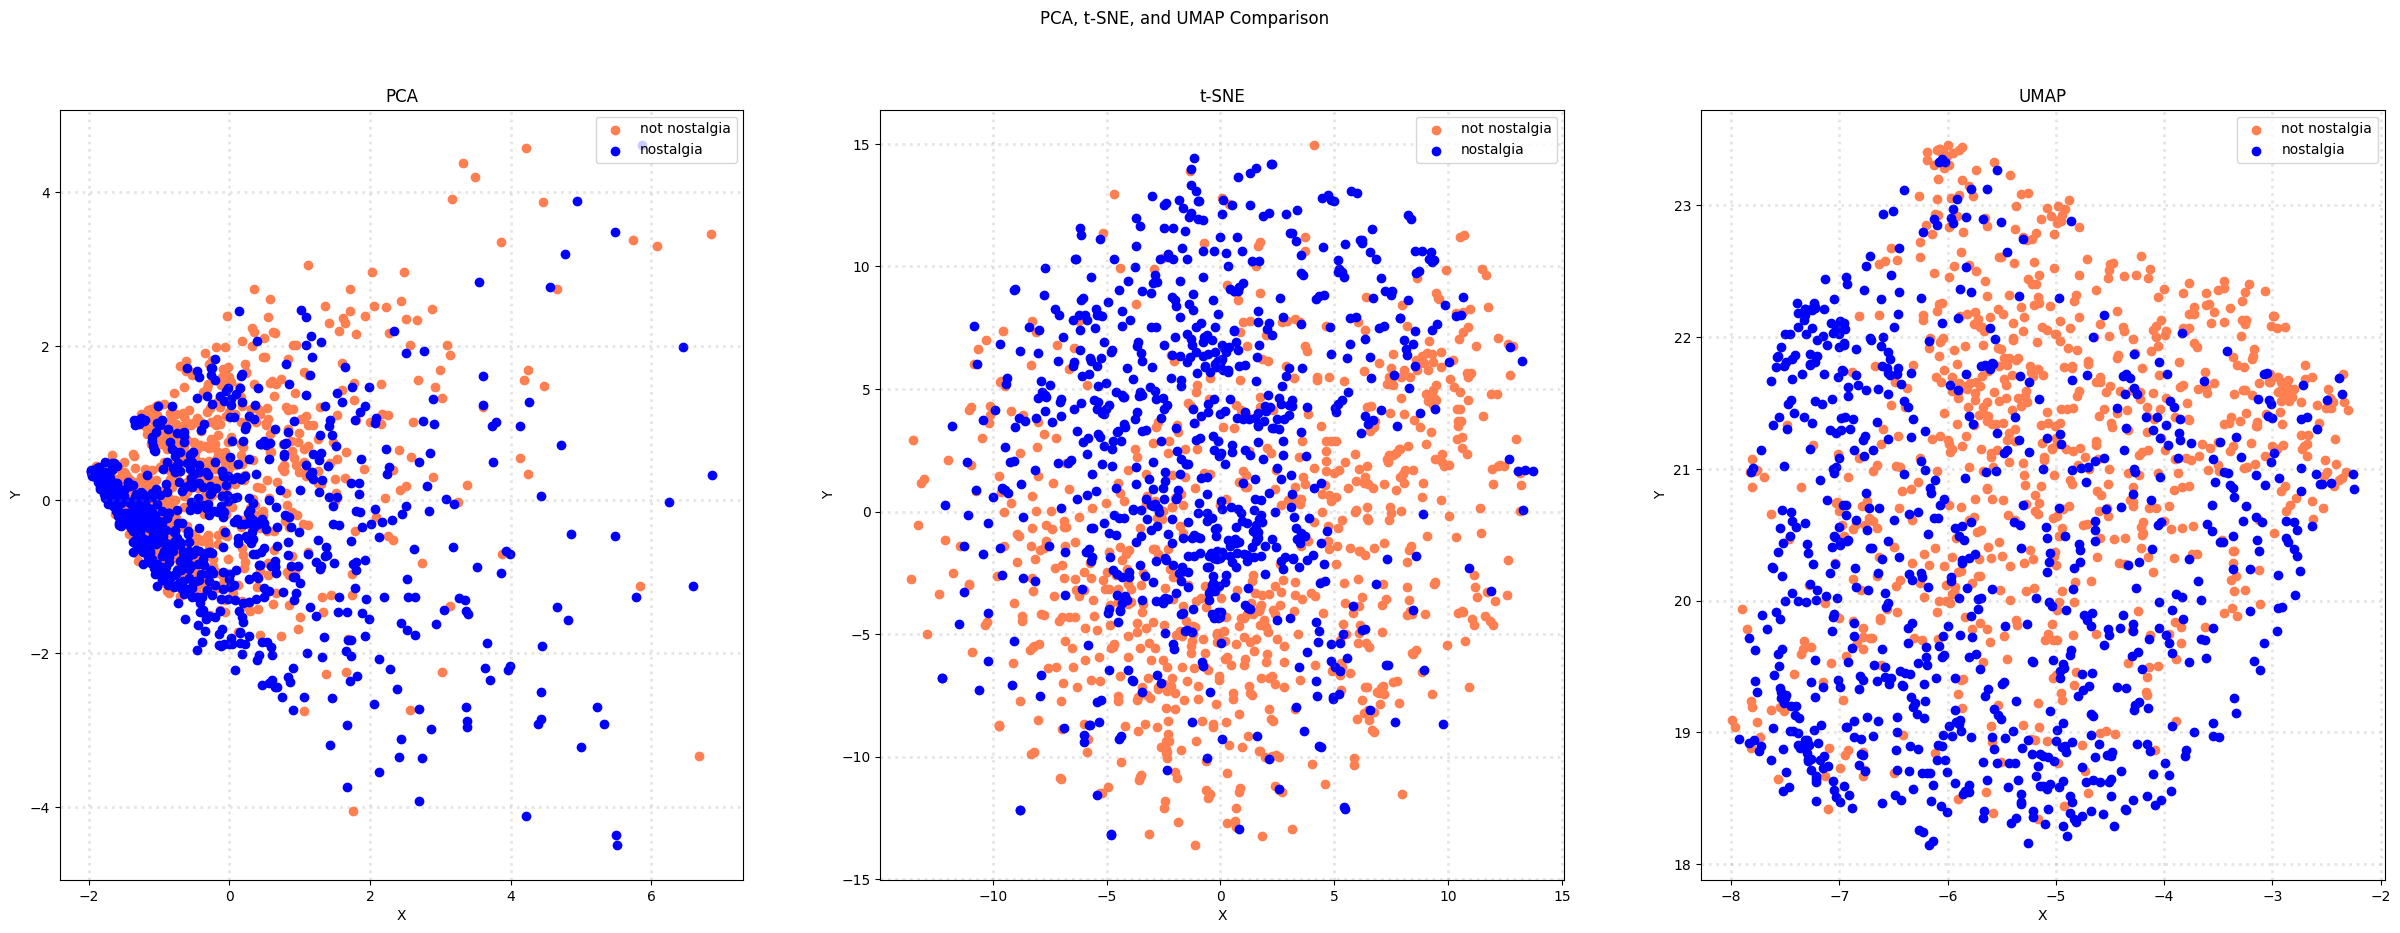

In [111]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [112]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)
print('done')

done


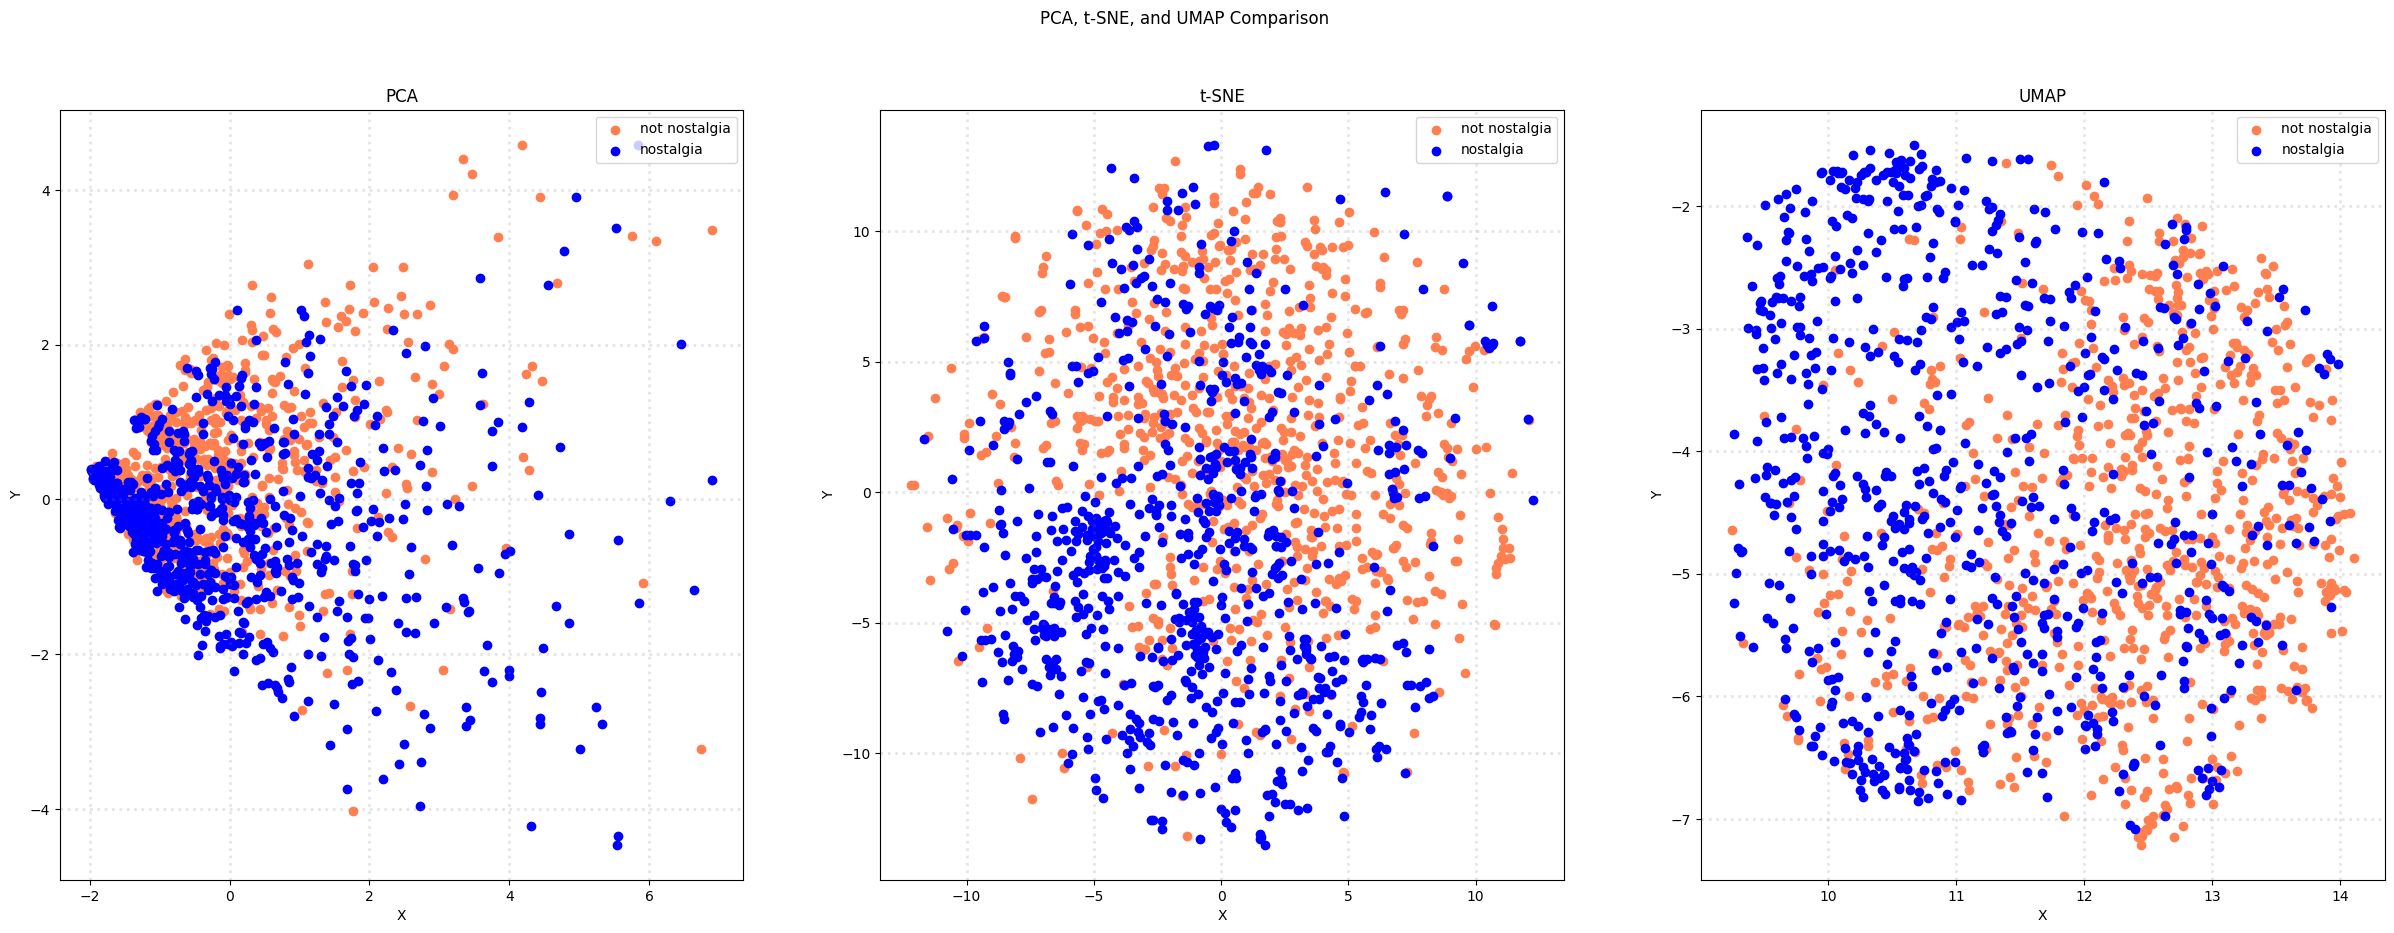

In [113]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### 3D

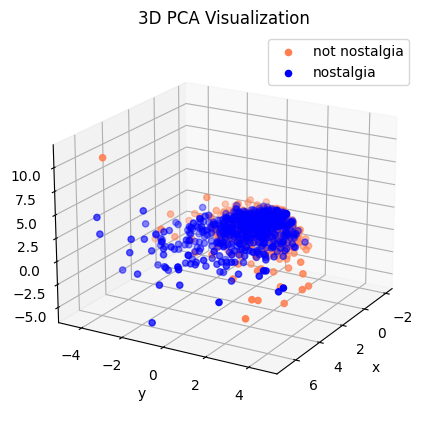

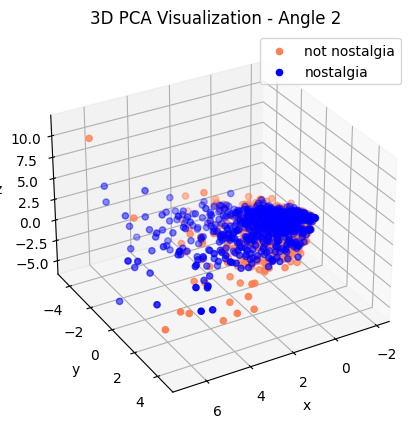

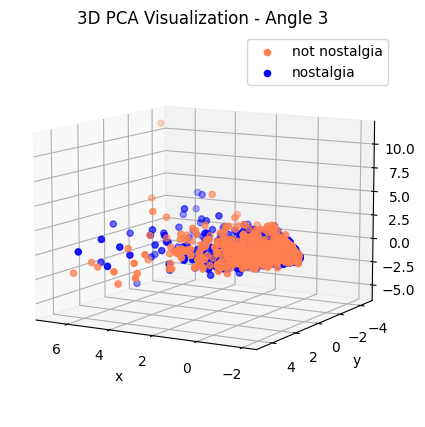

In [114]:
# Answer here
# PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()

for c, category in zip(col, categories):
    xs = X_pca_3d[X['sentiment'] == category][:, 0]
    ys = X_pca_3d[X['sentiment'] == category][:, 1]
    zs = X_pca_3d[X['sentiment'] == category][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_title('3D PCA Visualization')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc='upper right')

# Angle 1
ax.view_init(elev=20, azim=30)  
plt.show()

# Angle 2
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_pca_3d[X['sentiment'] == category][:, 0]
    ys = X_pca_3d[X['sentiment'] == category][:, 1]
    zs = X_pca_3d[X['sentiment'] == category][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
ax.set_title('3D PCA Visualization - Angle 2')
ax.view_init(elev=30, azim=60)  # Change the angle
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc='upper right')
plt.show()

# Angle 3
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_pca_3d[X['sentiment'] == category][:, 0]
    ys = X_pca_3d[X['sentiment'] == category][:, 1]
    zs = X_pca_3d[X['sentiment'] == category][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
ax.set_title('3D PCA Visualization - Angle 3')
ax.view_init(elev=10, azim=120)  # Change the angle
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc='upper right')
plt.show()

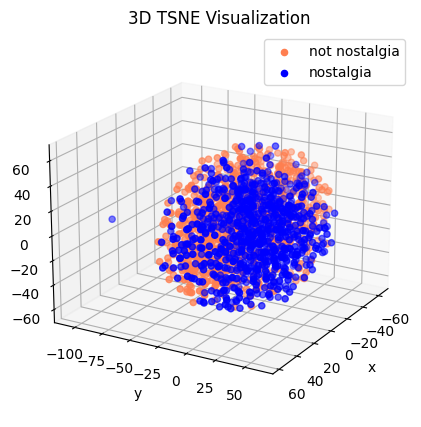

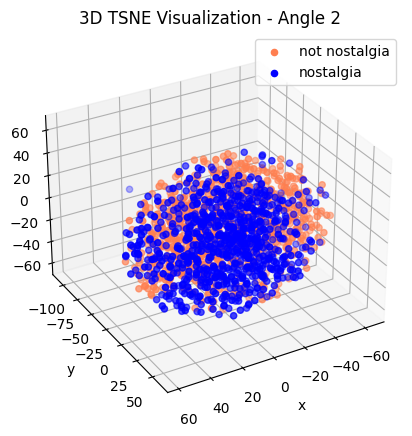

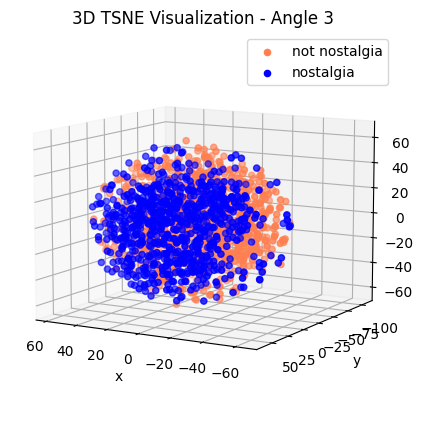

In [115]:
# TSNE
from sklearn.manifold import TSNE

X_tsne_3d = TSNE(n_components=3).fit_transform(tdm_df.values)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()

for c, category in zip(col, categories):
    xs = X_tsne_3d[X['sentiment'] == category][:, 0]
    ys = X_tsne_3d[X['sentiment'] == category][:, 1]
    zs = X_tsne_3d[X['sentiment'] == category][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_title('3D TSNE Visualization')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc='upper right')

# Angle 1
ax.view_init(elev=20, azim=30)  
plt.show()

# Angle 2
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_tsne_3d[X['sentiment'] == category][:, 0]
    ys = X_tsne_3d[X['sentiment'] == category][:, 1]
    zs = X_tsne_3d[X['sentiment'] == category][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
ax.set_title('3D TSNE Visualization - Angle 2')
ax.view_init(elev=30, azim=60)  # Change the angle
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc='upper right')
plt.show()

# Angle 3
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_tsne_3d[X['sentiment'] == category][:, 0]
    ys = X_tsne_3d[X['sentiment'] == category][:, 1]
    zs = X_tsne_3d[X['sentiment'] == category][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
ax.set_title('3D TSNE Visualization - Angle 3')
ax.view_init(elev=10, azim=120)  # Change the angle
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc='upper right')
plt.show()

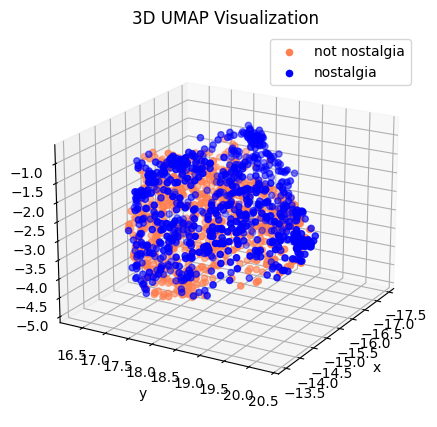

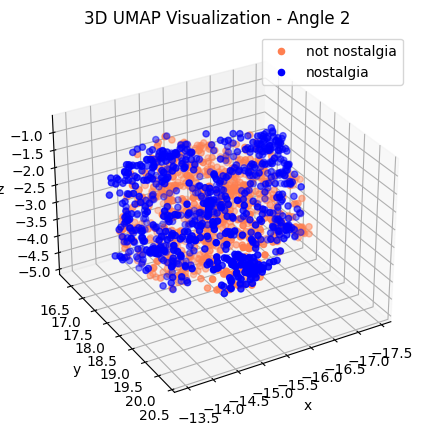

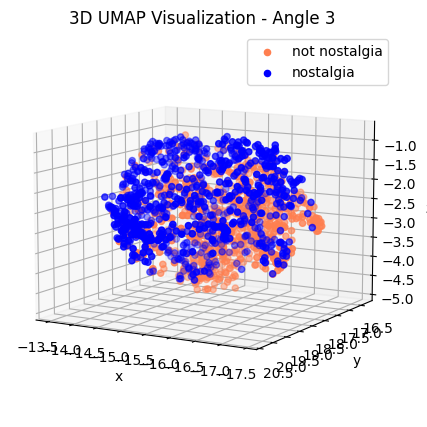

In [116]:
# UMAP
import umap

X_umap_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()

for c, category in zip(col, categories):
    xs = X_umap_3d[X['sentiment'] == category][:, 0]
    ys = X_umap_3d[X['sentiment'] == category][:, 1]
    zs = X_umap_3d[X['sentiment'] == category][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_title('3D UMAP Visualization')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc='upper right')

# Angle 1
ax.view_init(elev=20, azim=30)  
plt.show()

# Angle 2
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_umap_3d[X['sentiment'] == category][:, 0]
    ys = X_umap_3d[X['sentiment'] == category][:, 1]
    zs = X_umap_3d[X['sentiment'] == category][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
ax.set_title('3D UMAP Visualization - Angle 2')
ax.view_init(elev=30, azim=60)  # Change the angle
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc='upper right')
plt.show()

# Angle 3
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_umap_3d[X['sentiment'] == category][:, 0]
    ys = X_umap_3d[X['sentiment'] == category][:, 1]
    zs = X_umap_3d[X['sentiment'] == category][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
ax.set_title('3D UMAP Visualization - Angle 3')
ax.view_init(elev=10, azim=120)  # Change the angle
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc='upper right')
plt.show()

### Discretization and Binarization

In [117]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [123]:
mlb = preprocessing.LabelBinarizer()

In [124]:
mlb.fit(X.label)

LabelBinarizer()

In [125]:
X['bin_category'] = mlb.transform(X['label']).tolist()

In [126]:
X[0:9]

,sentiment,comment,label,unigrams,tokenized_text,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t...","{a, singers, life., to, I, loving., still, in,...",[0]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene...","{a, Never, to, I, still, him, when, kid, and, ...",[1]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{up, loving, think, a, my, is., to, it, I, jus...",[1]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{man, a, my, pray, to, I, God, Lou, me"", when,...",[0]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m...","{reminds, of, who, my, everyday, to, mum, play...",[1]
5,nostalgia,"Every time I heard this song as a child, I use...",1,"[Every, time, I, heard, this, song, as, a, chi...","{Now, Every, a, used, to, it, I, song., still,...",[1]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1,"[My, dad, loved, listening, to, Jim, Reeves, ,...","{things., a, to, it, dad, I, when, 70's, in, M...",[1]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,1,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{TO, a, to, I, in, nostalgic, since, now, Jim,...",[1]
8,not nostalgia,Wherever you are you always in my heart,0,"[Wherever, you, are, you, always, in, my, heart]","{Wherever, always, my, you, in, are, heart}",[0]


In [127]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)
X['bin_category2'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

,sentiment,comment,label,unigrams,tokenized_text,bin_category,bin_category2
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t...","{a, singers, life., to, I, loving., still, in,...",[0],[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene...","{a, Never, to, I, still, him, when, kid, and, ...",[1],[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{up, loving, think, a, my, is., to, it, I, jus...",[1],[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{man, a, my, pray, to, I, God, Lou, me"", when,...",[0],[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m...","{reminds, of, who, my, everyday, to, mum, play...",[1],[0]
5,nostalgia,"Every time I heard this song as a child, I use...",1,"[Every, time, I, heard, this, song, as, a, chi...","{Now, Every, a, used, to, it, I, song., still,...",[1],[0]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1,"[My, dad, loved, listening, to, Jim, Reeves, ,...","{things., a, to, it, dad, I, when, 70's, in, M...",[1],[0]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,1,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{TO, a, to, I, in, nostalgic, since, now, Jim,...",[1],[0]
8,not nostalgia,Wherever you are you always in my heart,0,"[Wherever, you, are, you, always, in, my, heart]","{Wherever, always, my, you, in, are, heart}",[0],[1]


## 4. Data Exploration

In [128]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [129]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [130]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [131]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/1t/gt97zhh53p5f8d2h13vcyjfw0000gn/T/ipykernel_51950/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/1t/gt97zhh53p5f8d2h13vcyjfw0000gn/T/ipykernel_51950/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/1t/gt97zhh53p5f8d2h13vcyjfw0000gn/T/ipykernel_51950/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/1t/gt97zhh53p5f8d2h13vcyjfw0000gn/T/ipykernel_51950/452772485.py:17: Dep

## 5. Data Classification

In [132]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['label', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

In [133]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9389    0.7788    0.8514       217
    nostalgia     0.8222    0.9528    0.8827       233

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [136]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['label', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['label'], test_size=0.3, random_state=42)

In [137]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [139]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8644444444444445

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9333    0.7742    0.8463       217
    nostalgia     0.8185    0.9485    0.8787       233

     accuracy                         0.8644       450
    macro avg     0.8759    0.8613    0.8625       450
 weighted avg     0.8739    0.8644    0.8631       450



# Part 3：Some tasks on the new dataset

## New data visualizations

In [ ]:
! pip install wordcloud

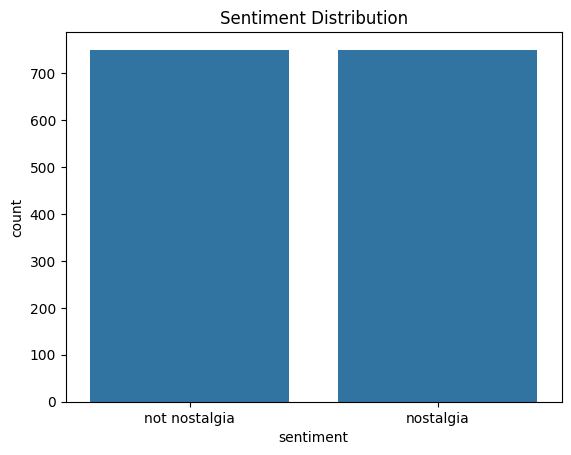

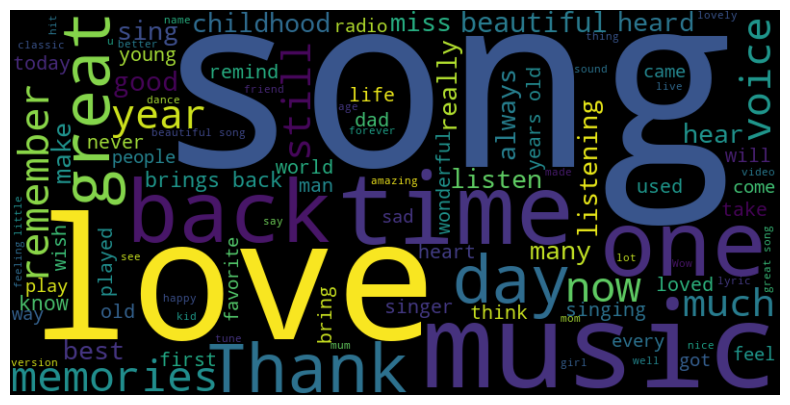

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.countplot(data=X, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()

text = " ".join(doc for doc in X['comment'])
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

A word cloud visually highlights the most frequent words in a text, with the size of each word indicating its relative frequency. This allows for a quick, intuitive overview of prominent themes and keywords in the data.

## TF-IDF features

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=None)  
X_tfidf = tfidf_vectorizer.fit_transform(X['comment']) 

In [148]:
print(X_tfidf.shape)

(1499, 3730)


## Naive Bayes classifier

### word frequency features

In [158]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

count_vectorizer = CountVectorizer(max_features=None)
X_count = count_vectorizer.fit_transform(X['comment'])

token_counts = np.asarray(X_count.sum(axis=0))[0]
token_count_dict = dict(zip(count_vectorizer.get_feature_names_out(), token_counts))

total_token_count = sum(token_counts)
print("#tokens:", total_token_count)
print("word frequency of every token:", token_count_dict)

#tokens: 35808
word frequency of every token: {'00': 1, '000': 2, '045': 1, '07': 2, '10': 16, '100': 5, '10m': 1, '11': 8, '11th': 1, '12': 11, '13': 8, '14': 15, '15': 10, '150': 2, '16': 12, '16years': 1, '17': 13, '17th': 1, '18': 9, '19': 6, '1927': 1, '1930': 1, '1930s': 1, '1950': 1, '1950s': 3, '1952': 2, '1954': 4, '1955': 1, '1956': 1, '1957': 1, '1958': 2, '1960': 5, '1960s': 3, '1962': 2, '1963': 12, '1964': 1, '1965': 3, '1966': 10, '1967': 3, '1968': 2, '1969': 2, '1970': 5, '1970s': 3, '1973': 7, '1974': 2, '1975': 1, '1976': 4, '1977': 3, '1979': 2, '1980': 7, '1980s': 1, '1981': 2, '1985': 2, '1987': 4, '1988': 6, '1989': 2, '1990': 1, '1992': 1, '1993': 1, '1996': 1, '1997': 1, '1998': 2, '1st': 5, '20': 11, '2000s': 1, '2002': 1, '2006': 2, '2009': 2, '2010': 1, '2014': 1, '2015': 2, '2016': 2, '2017': 1, '2018': 8, '2019': 25, '2040': 1, '20s': 1, '20th': 1, '21': 3, '21st': 1, '21yr': 1, '22': 2, '22nd': 1, '23': 1, '25': 4, '26': 1, '27': 3, '28': 3, '29': 3, '29t

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_count, X['sentiment'], test_size=0.3, random_state=42)

In [160]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8222    0.9528    0.8827       233
    nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



### TF-IDF features

In [161]:
# Model with TF-IDF features
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X['comment'])

token_tfidf_sums = np.asarray(X_tfidf.sum(axis=0))[0]
token_tfidf_dict = dict(zip(tfidf_vectorizer.get_feature_names_out(), token_tfidf_sums))

total_tfidf_weight_sum = sum(token_tfidf_sums)
print("TF-IDF total weight sum:", total_tfidf_weight_sum)
print("weight sum of every token:", token_tfidf_dict)

TF-IDF total weight sum: 6117.840748126113
weight sum of every token: {'00': 0.34184060887683854, '000': 0.32261778823454346, '045': 0.18634526340966318, '07': 0.5230849316717164, '10': 3.710779617942938, '100': 1.2689179038420886, '10m': 0.23509685445776413, '11': 1.9769618466439831, '11th': 0.2743305557735838, '12': 2.573982825035769, '13': 2.696037625900554, '14': 3.093372465392601, '15': 2.202672576631846, '150': 0.379436780660781, '16': 3.805865260146186, '16years': 0.23196919224604873, '17': 2.876108659457732, '17th': 0.4029171055311098, '18': 2.4083997494449556, '19': 1.5161495416430242, '1927': 0.3139760315093865, '1930': 0.382986616291298, '1930s': 0.1872307313154288, '1950': 0.1457770630569105, '1950s': 0.929321846532962, '1952': 0.5414703653542574, '1954': 0.899326991297661, '1955': 0.3560690919627296, '1956': 0.16718535702020587, '1957': 0.19074177389549404, '1958': 0.42159632688705473, '1960': 1.377550993075793, '1960s': 0.9204885655591705, '1962': 0.4043447877006244, '196

In [162]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, X['label'], test_size=0.3, random_state=42)

In [163]:
# Train the Naive Bayes classifier
nb_tfidf = BernoulliNB()
nb_tfidf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tfidf = nb_tfidf.predict(X_test)

# Evaluate the classifier
print("Accuracy (TF-IDF):", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report (TF-IDF):\n", classification_report(y_test, y_pred_tfidf, target_names=target_names, digits=4))

Accuracy (TF-IDF): 0.8844444444444445

Classification Report (TF-IDF):
                precision    recall  f1-score   support

not nostalgia     0.9275    0.8249    0.8732       217
    nostalgia     0.8521    0.9399    0.8939       233

     accuracy                         0.8844       450
    macro avg     0.8898    0.8824    0.8835       450
 weighted avg     0.8885    0.8844    0.8839       450



The TF-IDF method yields a lower overall weight sum compared to the raw frequency method, likely due to the down-weighting of common terms. This reduction helps the model focus on more distinctive tokens, which improves classification performance.

# Part 4：Improve the Data Preprocessing

Inefficiencies include inconsistent word forms, which led to redundancy in the feature space and a larger vocabulary size. This increased complexity and slowed model training while making it harder to extract meaningful patterns. 
Additionally, the noise in the data hindered the classifier's learning ability. 

Text normalization is important because it standardizes text data, making it consistent and easier for models to process. It helps treat similar words the same (e.g., "Apple" and "apple"), which reduces complexity.






In [170]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score
import re
import string

def normalize_text(text):
    text = text.lower()  
    text = re.sub(f'[{string.punctuation}]', '', text)  
    return text

X['text'] = X['comment'].apply(normalize_text)

tfidf_vectorizer = TfidfVectorizer() 
X_tfidf = tfidf_vectorizer.fit_transform(X['text'])
y = X['label']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_tfidf = BernoulliNB()
nb_tfidf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tfidf = nb_tfidf.predict(X_test)

# Evaluate the classifier
print("Accuracy (TF-IDF):", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report (TF-IDF):\n", classification_report(y_test, y_pred_tfidf, target_names=target_names, digits=4))

Accuracy (TF-IDF): 0.8866666666666667

Classification Report (TF-IDF):
                precision    recall  f1-score   support

not nostalgia     0.9192    0.8387    0.8771       217
    nostalgia     0.8611    0.9313    0.8948       233

     accuracy                         0.8867       450
    macro avg     0.8902    0.8850    0.8860       450
 weighted avg     0.8891    0.8867    0.8863       450



After text normalization, the accuracy improved, resulting in better model performance.